# Encoding by pronunciation

## preparation

In [20]:
# readlines from file './fr.dict'
def read_dict(path):
	dico = {}
	with open(path, 'r') as f:
		for line in f.readlines():
			line = line.strip()
			k = line.split(' ')[0]
			v = line.split(' ')[1:]
			dico[k] = v
	return dico

In [353]:
dico = read_dict('./fr/fr.dict')
print(dico.keys())

dict_keys(['a', 'aa', 'aadchit', 'aalto', 'aaron', 'abacha', 'abachidze', 'abadie', 'abagnale', 'abaissant', 'abaisse', 'abaissement', 'abaisser', 'abaissé', 'abaissée', 'abaissés', 'abandon', 'abandonna', 'abandonnait', 'abandonnant', 'abandonne', 'abandonnent', 'abandonner', 'abandonnera', 'abandonnerait', 'abandonneront', 'abandonnez', 'abandonné', 'abandonnée', 'abandonnées', 'abandonnés', 'abandons', 'abarca', 'abasourdi', 'abasourdie', 'abasourdis', 'abat', 'abat-jour', 'abats', 'abattage', 'abattages', 'abattement', 'abattements', 'abattent', 'abattit', 'abattoir', 'abattoirs', 'abattre', 'abattu', 'abattue', 'abattues', 'abattus', 'abb', 'abbado', 'abbas', 'abbatiale', 'abbaye', 'abbayes', 'abbesses', 'abbeville', 'abbey', 'abbot', 'abbott', 'abbé', 'abc', 'abchac', 'abcès', 'abdallah', 'abdel', 'abdelaati', 'abdelatif', 'abdelaziz', 'abdelazize', 'abdelghani', 'abdelhadi', 'abdelhafid', 'abdelhalim', 'abdelhamid', 'abdelkader', 'abdelkebir', 'abdelkrim', 'abdellah', 'abdelmaji

In [354]:
len(dico)

61079

In [160]:
dico['arriver'] 

['aa', 'rr', 'ii', 'vv', 'ei']

## remap consonants(and semi-consonants)

In [161]:
phones = set()
for v in dico.values():
    for phone in v:
        phones.add(phone)

In [162]:
phones, len(phones)

({'A',
  'C',
  'E',
  'I',
  'O',
  'U',
  'Y',
  'a',
  'aa',
  'ai',
  'an',
  'au',
  'bb',
  'c',
  'ch',
  'dd',
  'e',
  'ee',
  'ei',
  'eu',
  'ff',
  'gg',
  'gn',
  'i',
  'ii',
  'in',
  'jj',
  'kk',
  'll',
  'mm',
  'nn',
  'o',
  'oe',
  'on',
  'oo',
  'ou',
  'pp',
  'rr',
  'ss',
  'tt',
  'u',
  'un',
  'uu',
  'uy',
  'vv',
  'ww',
  'y',
  'yy',
  'zz'},
 49)

In [163]:
abbr = {}
for phone in phones:
    # if phone starts with a,e,i,o,u, then skip it
		if phone[0] in 'aeiou' or len(phone) == 1:
			continue
		else:
			abbr[phone] = phone[0]
abbr['uy'] = 'u'
abbr['gn'] = 'n'

In [164]:
abbr

{'ll': 'l',
 'vv': 'v',
 'gn': 'n',
 'ff': 'f',
 'tt': 't',
 'dd': 'd',
 'jj': 'j',
 'gg': 'g',
 'kk': 'k',
 'yy': 'y',
 'nn': 'n',
 'ww': 'w',
 'mm': 'm',
 'zz': 'z',
 'ss': 's',
 'pp': 'p',
 'ch': 'c',
 'bb': 'b',
 'rr': 'r',
 'uy': 'u'}

## NLP with spacy

In [9]:
# use spacy to analyse the lemma of a list of french words
import spacy
nlp = spacy.load('fr_core_news_lg')

In [23]:
token = nlp('belle')

In [24]:
token[0].morph.get('Gender')

['Fem']

In [22]:
token[0].morph

Number=Sing

In [198]:
from tqdm import tqdm

In [211]:
tokens = []
for word in tqdm(dico.keys()):
	tokens.append(nlp(word))

100%|██████████| 61080/61080 [14:07<00:00, 72.10it/s] 


## remove proper nouns

In [355]:
proper_nouns = []
for token in tokens:
	for tok in token:
		if tok.pos_ == "PROPN":
			dico.pop(token.text)
			proper_nouns.append(token.text)
			break

In [356]:
len(proper_nouns)

6829

## Remove acronyms

first collect single letter sound

In [357]:
letter_sound = {}
syllable_count = {}
for word, sound in dico.items():
	if len(word) == 1:
		letter_sound[word] = sound
		syllable_count[word] = len(sound)

In [358]:
letter_sound, syllable_count

({'a': ['aa'],
  'b': ['bb', 'ai'],
  'd': ['dd', 'ai'],
  'f': ['ai', 'ff'],
  'g': ['jj', 'ai'],
  'h': ['aa', 'ch'],
  'i': ['ii'],
  'j': ['jj', 'ii'],
  'k': ['kk', 'aa'],
  'l': ['ai', 'll'],
  'm': ['ai', 'mm'],
  'n': ['ai', 'nn'],
  'o': ['au'],
  'p': ['pp', 'ai'],
  'q': ['kk', 'uu'],
  's': ['ai', 'ss'],
  'v': ['vv', 'ai'],
  'w': ['dd', 'ou', 'bb', 'll', 'ee', 'vv', 'ai'],
  'x': ['kk', 'ss'],
  'y': ['ii'],
  'z': ['zz', 'ai', 'dd'],
  'à': ['a'],
  'â': ['a'],
  'ä': ['a'],
  'é': ['e'],
  'è': ['e'],
  'ê': ['e'],
  'î': ['i'],
  'ï': ['i'],
  'ô': ['o'],
  'ö': ['o'],
  'û': ['u'],
  'ü': ['u'],
  'ÿ': ['y'],
  'ç': ['c'],
  'À': ['A'],
  'Â': ['A'],
  'Ä': ['A'],
  'É': ['E'],
  'È': ['E'],
  'Ë': ['E'],
  'Ï': ['I'],
  'Ô': ['O'],
  'Ö': ['O'],
  'Ù': ['U'],
  'Û': ['U'],
  'Ç': ['C']},
 {'a': 1,
  'b': 2,
  'd': 2,
  'f': 2,
  'g': 2,
  'h': 2,
  'i': 1,
  'j': 2,
  'k': 2,
  'l': 2,
  'm': 2,
  'n': 2,
  'o': 1,
  'p': 2,
  'q': 2,
  's': 2,
  'v': 2,
  'w': 7,
  

In [359]:
def is_acronym(word, sound, threshold=2, show = False):
	matched = 0
	offset = 0
	sound_list = sound
	for letter in word:
		step = syllable_count[letter]
		if show:
			print(letter_sound[letter])
			print(sound_list[offset:offset+step])

		if letter_sound[letter] == sound_list[offset:offset+step]:
			matched += 1
		if matched >= threshold:
			return True
		offset += step
	return False

In [361]:
acronyms = []
for (word, sound) in tqdm(dico.items()):
	if len(word) < 2 or len(word) > 4 or "'" in word or "-" in word:
		continue
	try:
		if is_acronym(word, sound, 3):
			acronyms.append(word)
	except:
		print(word)

100%|██████████| 54250/54250 [00:00<00:00, 766456.45it/s]

abat
abe
abou
abri
abug
abus
ac
aces
acid
acné
acp
acre
act
acte
actu
acté
adoc
aek
aes
afer
afro
age
aged
agie
agir
agit
agro
aicf
aich
aide
aie
aigu
aile
aime
aine
air
aire
airs
aise
ait
ajej
alem
alpe
alta
alto
alu
amar
amat
ame
amen
amer
ames
amie
amor
amr
amro
anar
anc
ange
anrt
anse
ante
anti
août
ape
apec
apr
apte
apur
aqua
ar
arab
arad
arap
arba
arc
arcs
ardu
are
area
arf
arg
ari
aria
arme
army
armé
arne
aron
arpe
ars
art
arta
arte
arto
arts
ascq
aspe
asri
asse
at
atal
atd
atf
atif
atom
atos
atr
att
atta
atv
atys
au
aube
aude
auge
augé
aum
aune
aura
aure
auto
aux
avco
avec
aven
aveu
avez
axe
axes
axée
aye
ayez
azt
azur
aéré
aïe
bac
back
bacs
bahr
baht
baie
bakr
banc
bar
bari
baro
bars
base
bat
bata
bats
baup
baur
baux
bave
bcbg
bcci
bcp
be
bean
bear
beat
beau
bec
beeb
been
bei
beit
beko
bel
bela
bell
belo
ben
beni
benn
benz
berd
berl
best
beta
betc
beur
bex
bey
bez
bfce
bic
bide
bie
bien
biot
bir
bise
bit
bits
bled
bleu
bley
bloc
blot
blue
blur
boat
boc
boca
bode
boe
boit
bord


In [362]:
len(acronyms)

61

In [363]:
for acronym in acronyms:
    dico.pop(acronym)

now we get a clean dictionary (hopefully)

In [547]:
d = {k: ' '.join(v) for k, v in dico.items()}

In [548]:
# convert dico to a dataframe, where its value is a list
import pandas as pd
df = pd.DataFrame.from_dict(d, orient='index', columns=['sound'])

In [549]:
df

,sound
a,aa
aadchit,aa aa dd ch ii
aalto,aa aa ll tt au
aaron,aa aa rr on
abacha,aa bb aa ch aa
...,...
Ô,O
Ö,O
Ù,U
Û,U


## Transcription

In [550]:
import re
def encode(phonemes):
	vowels = re.compile('(aa|ai|au|ee|ei|eu|ii|oe|oo|ou|uu)\d*', re.VERBOSE)
	nasal_vowels = re.compile('an|in|on|un')
	phonemes = re.sub(vowels, 'q', phonemes)
	# complex consonants
	phonemes = re.sub('pp', 'p', phonemes)
	phonemes = re.sub('bb', 'b', phonemes)
	phonemes = re.sub('tt', 't', phonemes)
	phonemes = re.sub('dd', 'd', phonemes)
	phonemes = re.sub('kk', 'k', phonemes)
	phonemes = re.sub('gg', 'g', phonemes)
	phonemes = re.sub('ff', 'f', phonemes)
	phonemes = re.sub('vv', 'v', phonemes)
	phonemes = re.sub('mm', 'm', phonemes)
	phonemes = re.sub('nn', 'n', phonemes)
	phonemes = re.sub('gn', 'n', phonemes)
	phonemes = re.sub('ll', 'l', phonemes)
	phonemes = re.sub('rr', 'r', phonemes)
	phonemes = re.sub('ss', 's', phonemes)
	phonemes = re.sub('zz', 'z', phonemes)
	phonemes = re.sub('ch', 'c', phonemes)
	phonemes = re.sub('jj', 'j', phonemes)
	phonemes = re.sub('ww', 'w', phonemes)
	phonemes = re.sub('yy', 'y', phonemes)
	phonemes = re.sub('uy', 'u', phonemes)
	phonemes = re.sub(nasal_vowels, 'i', phonemes)

	return phonemes

In [551]:
def transcribe(phonemes_list):
	encoding_list = []
	for phonemes in phonemes_list:
		encoding_list.append(encode(phonemes))
	return encoding_list

In [552]:
encoding_list = transcribe(df.sound.astype('str'))
df['encoding'] = encoding_list

In [553]:
df

,sound,encoding
a,aa,q
aadchit,aa aa dd ch ii,q q d c q
aalto,aa aa ll tt au,q q l t q
aaron,aa aa rr on,q q r i
abacha,aa bb aa ch aa,q b q c q
...,...,...
Ô,O,O
Ö,O,O
Ù,U,U
Û,U,U


## replace 3-grams encoding by itself, replace initial q by the original initial

In [554]:
new_encodings = []
for word, encoding in zip(df.index, df['encoding']):
    if len(word) <= 3:
        new_encodings.append(word)
    elif encoding[0] == 'q':
        new_encodings.append(word[0]+encoding[1:])
    else:
        new_encodings.append(encoding)
df['new_encoding'] = new_encodings

In [555]:
df['new_encoding'][0:10]

a                        a
aadchit          a q d c q
aalto            a q l t q
aaron              a q r i
abacha           a b q c q
abachidze    a b q c q d z
abadie           a b q d q
abagnale     a b q n y q l
abaissant        a b q s i
abaisse            a b q s
Name: new_encoding, dtype: object

## remove non-final vowels

In [556]:
'abc'[:-1]

'ab'

In [557]:
vowel_free = []
for word, encoding in zip(df.index,df['new_encoding']):
    encoding = re.sub(' ', '', encoding)
    if len(word) > 3 and len(encoding) >= 3:
        encoding = re.sub('q', '', encoding[:-1]) + encoding[-1]
    vowel_free.append(encoding)

In [558]:
df['vowel_free'] = vowel_free

In [559]:
df

,sound,encoding,new_encoding,vowel_free
a,aa,q,a,a
aadchit,aa aa dd ch ii,q q d c q,a q d c q,adcq
aalto,aa aa ll tt au,q q l t q,a q l t q,altq
aaron,aa aa rr on,q q r i,a q r i,ari
abacha,aa bb aa ch aa,q b q c q,a b q c q,abcq
...,...,...,...,...
Ô,O,O,Ô,Ô
Ö,O,O,Ö,Ö
Ù,U,U,Ù,Ù
Û,U,U,Û,Û


## Detect inefficient encoding

In [560]:
residue = df.index[df.index.str.len() < df.vowel_free.str.len()]

In [561]:
display(residue)

Index(['anrt', 'bcbg', 'bddp', 'bspp', 'cdja', 'cfdd', 'cfdt', 'cfpj', 'clcv',
       'cnct', 'cndp', 'cpld', 'cqfd', 'csfb', 'dcrg', 'dncg', 'dpsd', 'escp',
       'exclu', 'expo', 'extra', 'exxon', 'fcpe', 'fdlp', 'ffbb', 'flnks',
       'fntp', 'fntr', 'fpip', 'fple', 'giorgio', 'gspc', 'hsbc', 'htlv',
       'inpg', 'inrp', 'kpmg', 'lplp', 'ltcm', 'ltdh', 'mcps', 'mpci', 'mrta',
       'msnbc', 'ndlr', 'nkvd', 'nmpp', 'ntic', 'ocrb', 'pnpg', 'ppdg', 'rasd',
       'ratp', 'rdrp', 'rpcr', 'rpdc', 'rpfie', 'sacp', 'scpc', 'scpi', 'sdbo',
       'sdlp', 'sgdn', 'sglce', 'sivp', 'sjti', 'snapc', 'sncm', 'snpe',
       'snpnc', 'snpt', 'spqr', 'srpj', 'stock', 'stoxx', 'tvhd', 'usfp',
       'wmap'],
      dtype='object')

In [562]:
df.drop(residue, inplace=True)

In [563]:
df

,sound,encoding,new_encoding,vowel_free
a,aa,q,a,a
aadchit,aa aa dd ch ii,q q d c q,a q d c q,adcq
aalto,aa aa ll tt au,q q l t q,a q l t q,altq
aaron,aa aa rr on,q q r i,a q r i,ari
abacha,aa bb aa ch aa,q b q c q,a b q c q,abcq
...,...,...,...,...
Ô,O,O,Ô,Ô
Ö,O,O,Ö,Ö
Ù,U,U,Ù,Ù
Û,U,U,Û,Û


## Remove anglicisme

In [564]:
anglicisme = df[(df.index.str.contains("ing")) & (df.sound.str[-1] == "g")].index

In [565]:
anglicisme

Index(['accounting', 'advertising', 'aquaplaning', 'banking', 'berling',
       'bilingue', 'bilingues', 'boeing', 'breaking', 'briefing',
       ...
       'tenzing', 'thanksgiving', 'timing', 'trading', 'travellings',
       'trilingue', 'vikings', 'wyoming', 'yachting', 'zapping'],
      dtype='object', length=110)

In [566]:
df.drop(anglicisme, inplace=True)

In [567]:
df

,sound,encoding,new_encoding,vowel_free
a,aa,q,a,a
aadchit,aa aa dd ch ii,q q d c q,a q d c q,adcq
aalto,aa aa ll tt au,q q l t q,a q l t q,altq
aaron,aa aa rr on,q q r i,a q r i,ari
abacha,aa bb aa ch aa,q b q c q,a b q c q,abcq
...,...,...,...,...
Ô,O,O,Ô,Ô
Ö,O,O,Ö,Ö
Ù,U,U,Ù,Ù
Û,U,U,Û,Û


## remove words with `X` pos tag

In [568]:
X = []
for token in tokens:
    if len(token.text) > 1:
        for tok in token:
            if tok.pos_ == 'X':
                X.append(token.text)

In [569]:
len(X)

418

In [570]:
X = pd.Index(X, dtype='str')

In [571]:
df.drop(X, inplace=True, errors='ignore')

In [572]:
df

,sound,encoding,new_encoding,vowel_free
a,aa,q,a,a
aadchit,aa aa dd ch ii,q q d c q,a q d c q,adcq
aalto,aa aa ll tt au,q q l t q,a q l t q,altq
aaron,aa aa rr on,q q r i,a q r i,ari
abacha,aa bb aa ch aa,q b q c q,a b q c q,abcq
...,...,...,...,...
Ô,O,O,Ô,Ô
Ö,O,O,Ö,Ö
Ù,U,U,Ù,Ù
Û,U,U,Û,Û


some residues need to be manually deleted

In [573]:
with pd.option_context('display.max_rows', None):
	display(df[df.index.str.contains("ing")])

,sound,encoding,new_encoding,vowel_free
barings,bb ai rr ii nn gg zz,b q r q n g z,b q r q n g z,brngz
berlingske,bb ai rr ll ii nn gg ss kk,b q r l q n g s k,b q r l q n g s k,brlngsk
berlinguer,bb ai rr ll in gg ei,b q r l i g q,b q r l i g q,brligq
bilinguisme,bb ii ll in gg uy ii ss mm,b q l i g u q s m,b q l i g u q s m,bligusm
bingol,bb in gg oo ll,b i g q l,b i g q l,bigl
blanc-seing,bb ll an ss in,b l i s i,b l i s i,blisi
bohringer,bb au rr in jj ei,b q r i j q,b q r i j q,brijq
bringuebalants,bb rr in gg bb aa ll an,b r i g b q l i,b r i g b q l i,brigbli
brookings,bb rr ou kk ii nn gg zz,b r q k q n g z,b r q k q n g z,brkngz
buckingham,bb uu kk ii nn gg aa mm,b q k q n g q m,b q k q n g q m,bkngm


## normalizing accents

In [574]:
from unidecode import unidecode
unidecode('épinglés')

'epingles'

In [575]:
accent_free = df['vowel_free'].apply(lambda x: unidecode(x))

In [576]:
df['vowel_free'] = accent_free

In [577]:
df

,sound,encoding,new_encoding,vowel_free
a,aa,q,a,a
aadchit,aa aa dd ch ii,q q d c q,a q d c q,adcq
aalto,aa aa ll tt au,q q l t q,a q l t q,altq
aaron,aa aa rr on,q q r i,a q r i,ari
abacha,aa bb aa ch aa,q b q c q,a b q c q,abcq
...,...,...,...,...
Ô,O,O,Ô,O
Ö,O,O,Ö,O
Ù,U,U,Ù,U
Û,U,U,Û,U


## encodings statistics 

In [578]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
def plot_string_length_freq(encodings: pd.DataFrame):
	wd_length = encodings.reset_index().apply(lambda x: x.str.len(), axis=0).astype(pd.Int64Dtype())
	display(wd_length.describe(percentiles=[.9,.95,.99]).drop(['count','50%','min']))

	wd_length_count = wd_length.melt()
	wd_length_count = wd_length_count.pivot_table(index='value', columns='variable', values='value', aggfunc='size')
	plt.style.use('seaborn-v0_8-notebook')
	wd_length_count.plot(kind='bar')

def coincident_stats(encodings: pd.DataFrame, ext = 10):
	total = len(encodings)

	multiplicity = encodings.value_counts()
	multiplicity.index.name = 'encoding'
	multiplicity.name = 'multiplicity'

	multiplicity_freq = multiplicity.value_counts()
	multiplicity_freq.index.name = 'multiplicity'
	multiplicity_freq.name = 'freq'

	coincident_rate = 1 - (multiplicity_freq.loc[1]) / multiplicity_freq.sum()

	extremes = multiplicity_freq.loc[ext+1:]
	word_count_with_extreme_encodings = (extremes.index.to_numpy() * extremes.values).sum()
	ratio_with_extreme_encodings = np.round( word_count_with_extreme_encodings/total *100 , 2)

	print(f'coincident_rate: {np.round(coincident_rate * 100,2)}%')
	print(f'There are {extremes.sum()} encodings have more than {ext} multiplicities, encoding {word_count_with_extreme_encodings}({ratio_with_extreme_encodings}%) words.')

	q = multiplicity.quantile([.8,.9,.95,.99])
	q.index.name = 'quantile'
	q.name = 'multiplicity'

	print('extreme:')
	display(extremes.to_frame())
	print('quantile:')
	display(q.to_frame())

	extreme_encoding = pd.Series(multiplicity[multiplicity > ext].index)
	extreme_encoding.name = 'freq'
	extreme_encoding.index.name = 'encoding_length'
	if len(extreme_encoding) > 0:
		# display(extreme_encoding)
		sn.barplot(x = extreme_encoding.str.len().value_counts().index, y = extreme_encoding.str.len().value_counts())
	# plt.hist(multiplicity,bins=range(min(multiplicity), max(multiplicity)+1,1))
	return multiplicity, multiplicity_freq, extreme_encoding

coincident_rate: 42.27%
There are 382 encodings have more than 10 multiplicities, encoding 6435(12.0%) words.
extreme:


,freq
multiplicity,
11,75
13,46
12,45
14,35
17,29
15,25
16,18
18,18
19,15


quantile:


,multiplicity
quantile,
0.80,2.0
0.90,4.0
0.95,6.0
0.99,13.0


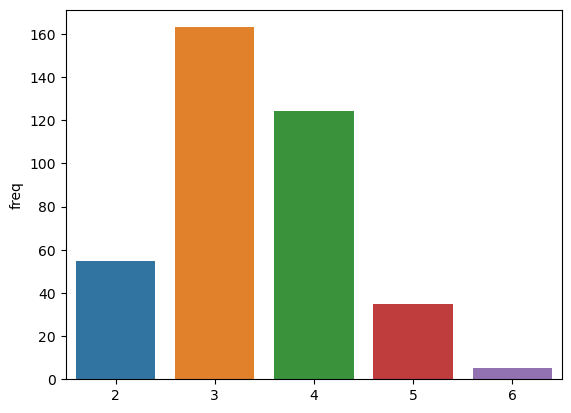

In [579]:
multiplicity, _, extreme_encoding = coincident_stats(df.vowel_free)

In [580]:
multiplicity[multiplicity > 20]

encoding
krq    65
prq    64
trq    53
klq    47
mnq    43
       ..
jq     21
kr     21
rzq    21
rsq    21
pli    21
Name: multiplicity, Length: 74, dtype: int64

In [581]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
	display(df[df.vowel_free.isin(['krq'])])

,sound,encoding,new_encoding,vowel_free
cara,kk aa rr aa,k q r q,k q r q,krq
carat,kk aa rr aa,k q r q,k q r q,krq
carats,kk aa rr aa,k q r q,k q r q,krq
carhaix,kk aa rr ai,k q r q,k q r q,krq
carreau,kk aa rr au,k q r q,k q r q,krq
carreaux,kk aa rr au,k q r q,k q r q,krq
carrey,kk aa rr ei,k q r q,k q r q,krq
carré,kk aa rr ei,k q r q,k q r q,krq
carrée,kk aa rr ei,k q r q,k q r q,krq
carrées,kk aa rr ei,k q r q,k q r q,krq


silent s is problematic, try to see if we can reduce the coincidence by add grammatical encoding. The rule is simple: if the plural is pronounced as same as the singular, we add a `a` after 

In [582]:
nlp('ports')[0].morph.get('Number')

['Plur']

In [583]:
d = {}
for token in tokens:
	# for simplicity, we don't treat compound words
	if len(token) == 1:
		tok = token[0]
		if tok.text[-1] == 's' and 'Plur' in tok.morph.get('Number'):
			try:
				if df.vowel_free[tok.text] == df.vowel_free[tok.text[:-1]]:
					d[tok.text] = df.vowel_free[tok.text] + 'a'
			except:
				print(tok.text)

abbesses
abcès
abesses
abordons
abracadabrantes
abrams
abricotiers
abscons
absentéistes
abysses
accepterons
acceptons
accointances
accourus
accueillons
accusons
aces
achalandés
acharnons
achetons
adaptateurs
addictions
additifs
adjacentes
admettons
admis
adorateurs
ados
adressons
affabulations
afficheurs
affidés
affineurs
affirmons
affres
affrontées
affréteurs
afférentes
afférents
aficionados
agapes
agglutinés
agissements
agissons
agriculteurs
agrumes
agrégés
aguets
aidons
aigues
aiguillés
aimais
aimerions
aimons
airlines
ajoutons
alamos
albatros
alexandrins
algorithmes
allocataires
allons
alpages
alpilles
alsaciens
alvéoles
amandiers
amarres
ambages
ambulanciers
amiens
amphétamines
ampoulés
amérindiennes
amérindiens
anas
andes
andres
angeles
angels
angines
anguleuses
annales
annonciatrices
annoncions
annotations
annuels
antagonistes
anthropologues
anthropophages
antiaériens
antichocs
anticoncurrentielles
antifrançais
antigouvernementales
antihélicoptères
antijuifs
antillais
antilles
a

In [584]:
len(d)

9978

In [585]:
df['a-form'] = df['vowel_free']

In [586]:
df.loc[pd.Index(d.keys()), 'a-form'] = list(d.values())

coincident_rate: 23.78%
There are 240 encodings have more than 10 multiplicities, encoding 3975(7.41%) words.
extreme:


,freq
multiplicity,
11,39
12,38
13,31
14,28
15,13
16,13
17,10
19,9
21,9


quantile:


,multiplicity
quantile,
0.80,2.0
0.90,3.0
0.95,4.0
0.99,9.0


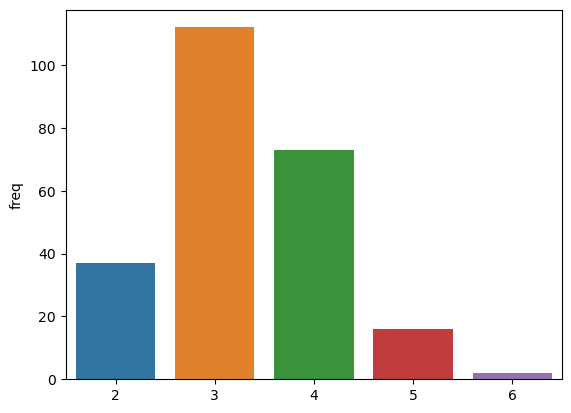

In [587]:
multiplicity, _, extreme_encoding = coincident_stats(df['a-form'])

In [588]:
multiplicity[multiplicity > 10]

encoding
krq     56
prq     56
trq     46
klq     38
srq     38
        ..
rklq    11
titq    11
pkq     11
prdq    11
bt      11
Name: multiplicity, Length: 240, dtype: int64

In [589]:
df[df['a-form'] == 'prq']

,sound,encoding,new_encoding,vowel_free,a-form
paiera,pp ai rr aa,p q r q,p q r q,prq,prq
paierait,pp ai rr ai,p q r q,p q r q,prq,prq
paierez,pp ai rr ei,p q r q,p q r q,prq,prq
para,pp aa rr aa,p q r q,p q r q,prq,prq
parait,pp aa rr ai,p q r q,p q r q,prq,prq
paras,pp aa rr aa,p q r q,p q r q,prq,prq
paraît,pp aa rr ai,p q r q,p q r q,prq,prq
parer,pp aa rr ei,p q r q,p q r q,prq,prq
pari,pp aa rr ii,p q r q,p q r q,prq,prq
parie,pp aa rr ii,p q r q,p q r q,prq,prq


well introducing a-form is not very promising, let's just encode the q-termination by the original final letter

In [590]:
df['tail'] = df['vowel_free']

In [591]:
id = df[(df.vowel_free.str.len() > 1) & (df.vowel_free.str[-1] == 'q')].index

In [592]:
df.loc[id, 'tail'] = df.loc[id, 'tail'].str[:-1] + id.str[-1]

coincident_rate: 32.27%
There are 154 encodings have more than 10 multiplicities, encoding 2366(4.41%) words.
extreme:


,freq
multiplicity,
11,33
12,23
14,14
13,14
15,12
18,11
16,8
17,8
20,8


quantile:


,multiplicity
quantile,
0.80,2.0
0.90,3.0
0.95,4.0
0.99,8.0


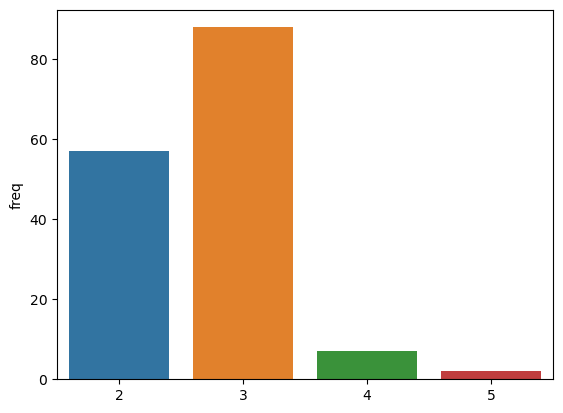

In [593]:
multiplicity, _, extreme_encoding = coincident_stats(df['tail'])

In [594]:
multiplicity[multiplicity > 10]

encoding
prt     32
mr      31
prs     31
pr      30
krs     29
        ..
lbr     11
mlt     11
ln      11
itrs    11
rmi     11
Name: multiplicity, Length: 154, dtype: int64

In [595]:
df[df['tail'] == 'prt']

,sound,encoding,new_encoding,vowel_free,a-form,tail
paierait,pp ai rr ai,p q r q,p q r q,prq,prq,prt
parait,pp aa rr ai,p q r q,p q r q,prq,prq,prt
paraît,pp aa rr ai,p q r q,p q r q,prq,prq,prt
parient,pp aa rr ii,p q r q,p q r q,prq,prq,prt
parot,pp aa rr au,p q r q,p q r q,prq,prq,prt
parte,pp aa rr tt,p q r t,p q r t,prt,prt,prt
parut,pp aa rr uu,p q r q,p q r q,prq,prq,prt
parût,pp aa rr uu,p q r q,p q r q,prq,prq,prt
perot,pp ee rr au,p q r q,p q r q,prq,prq,prt
perrot,pp ai rr au,p q r q,p q r q,prq,prq,prt


In [596]:
df.to_csv('./fr/encoding.csv', sep=',', columns=['sound', 'tail'])

In [3]:
import pandas as pd
df_lexique = pd.read_csv('./fr/Lexique383/Lexique383.tsv', sep='\t', header=0, usecols=[0,1,2,7])

In [4]:
df_lexique.head()

,ortho,phon,lemme,freqlemlivres
0,a,a,a,58.65
1,a,a,avoir,12800.81
2,a,a,avoir,6426.49
3,a capella,akapEla,a capella,0.07
4,a cappella,akapEla,a cappella,0.07


In [7]:
df = pd.read_csv('./fr/encoding.csv', header=0, sep=',', index_col=0)

In [8]:
df

,sound,tail
a,aa,a
aadchit,aa aa dd ch ii,adct
aalto,aa aa ll tt au,alto
aaron,aa aa rr on,ari
abacha,aa bb aa ch aa,abca
...,...,...
Ô,O,O
Ö,O,O
Ù,U,U
Û,U,U


In [10]:
diff = set(df_lexique.ortho).difference(set(df.index))

In [23]:
df_lexique[df_lexique.ortho.isin(diff)].sort_values(by='freqlemlivres', ascending=False)[:100]

,ortho,phon,lemme,freqlemlivres
60229,fussions,fysj§,être,15085.47
60580,fûmes,fym,être,15085.47
60585,fûtes,fyt,être,15085.47
60227,fussiez,fysje,être,15085.47
60225,fusses,fys,être,15085.47
...,...,...,...,...
99455,prennes,pREn,prendre,1466.42
99442,prendriez,pR@dRije,prendre,1466.42
99439,prendras,pR@dRa,prendre,1466.42
99443,prendrions,pR@dRij§,prendre,1466.42
